In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Task 1 completed
Task 2 completed
Task 3 completed
Task 4 completed
Task 5 completed
Task 6 completed


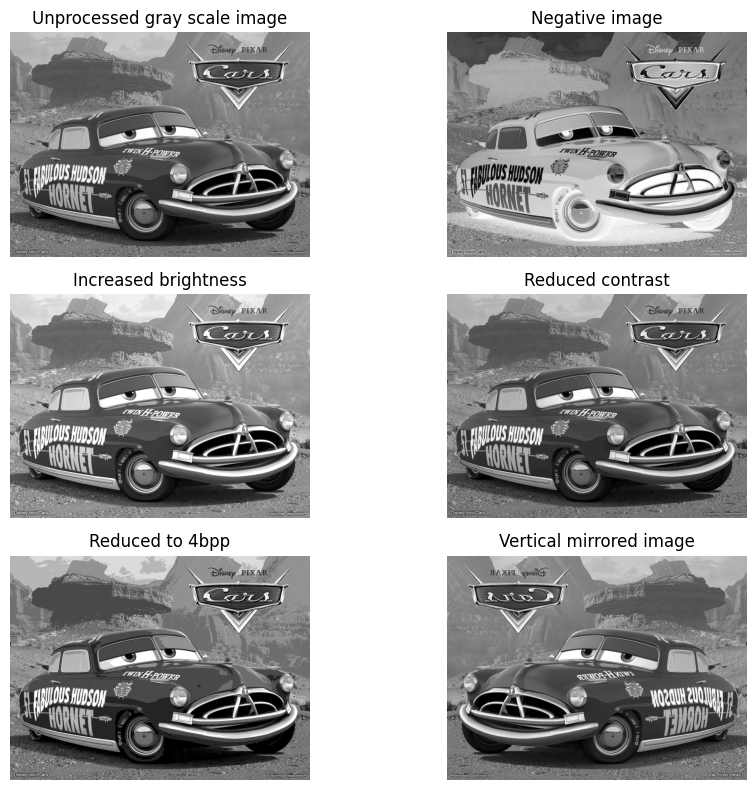

In [11]:
# open image as COLOR image - R,G,B (24 bit image)
# does not used IMREAD_GRAYSCALE for open image
image = cv.imread("./07.jpg", cv.IMREAD_COLOR)

# by changing brightness of each R,G,B value we can change the grayscale.
# Same value for each doesnot make a better grayscale image
brightness_green = 0.5
brightness_red = 0.3
brightness_blue = 0.2

# create temperory image for operations
# need 8bpp image with one channel. Create zero array and then assign related grayscale value
temp_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

# converting the grayscale value using nested for loop (3 byte into one byte)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        temp_image[i][j] = int(image[i][j][0] * brightness_red + image[i]
                               [j][1] * brightness_green + image[i][j][2] * brightness_blue)


# creating 3x2 subplot using matplotlib
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
axes = axes.flatten()  # for easy iteration

# grid(1,1) unprocessed gray scale image
cv.imwrite("OPImage_(1,1).jpg", temp_image)
axes[0].imshow(temp_image, cmap="gray")
axes[0].set_title("Unprocessed gray scale image")
axes[0].axis('off')
print("Task 1 completed")

# grid(1,2) negative image
# assume negative image is invertion of grayscale image
neg_image = temp_image.copy()

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        neg_image[i][j] = 255 - neg_image[i][j]

cv.imwrite("OPImage_(1,2).jpg", neg_image)
axes[1].imshow(neg_image, cmap="gray")
axes[1].set_title("Negative image")
axes[1].axis('off')
print("Task 2 completed")

# grid(1,3) increased brightness by 20% on each level
bri_image = temp_image.copy()

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        bri_image[i][j] = np.clip(bri_image[i][j] * 1.2, 0, 255)

cv.imwrite("OPImage_(1,3).jpg", bri_image)
axes[2].imshow(bri_image, cmap="gray")
axes[2].set_title("Increased brightness")
axes[2].axis('off')
print("Task 3 completed")

# grid(2,1) reduce image contrast such that gray levels remains between 125 to 175
reduced_contrast_image = temp_image.copy()
contrast = 50

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        gray_val = temp_image[i][j] * contrast // 255
        reduced_contrast_image[i][j] = gray_val + 125

cv.imwrite("OPImage_(2,1).jpg", reduced_contrast_image)
axes[3].imshow(reduced_contrast_image, cmap="gray")
axes[3].set_title("Reduced contrast")
axes[3].axis('off')
print("Task 4 completed")

# grid(2,2) reduce image gray level depth to 4bpp from 8bpp
reduced_image = temp_image.copy()
factor = 32  # 8bpp to 4bpp means 32
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        reduced_image[i][j] = int(reduced_image[i][j] / factor)

cv.imwrite("OPImage_(2,2).jpg", reduced_image)

axes[4].imshow(reduced_image, cmap="gray")
axes[4].set_title("Reduced to 4bpp")
axes[4].axis('off')
print("Task 5 completed")

# grid(2,3) vertical mirror image of the unprocessed image
mirror_image = temp_image.copy()

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        mirror_image[i][j] = temp_image[i][-(j+1)]

cv.imwrite("OPImage_(2,3).jpg", mirror_image)

axes[5].imshow(mirror_image, cmap="gray")
axes[5].set_title("Vertical mirrored image")
axes[5].axis('off')
print("Task 6 completed")

plt.savefig("Processed Images-7-gray.jpg")
plt.tight_layout()
plt.show()